* Rahul S. here. Following is the evaluation of the cars by Clustering by . Looking for improvements. Not sure if the process is valid.

# Hierarchical Clustering - Car Evaluation

## Import all libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import car eval data set

In [32]:
## Load dataset - data is categorical
clist=['buying','maint', 'doors', 'persons', 'lug_boot', 'safety', 'carclass']
df = pd.read_csv("uci-car-evaluation/original/car_data.csv", names=clist)


In [33]:
df.shape

(1728, 7)

In [34]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,carclass
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [35]:
buy = {'vhigh':0, 'high':1, 'med':2, 'low':3}
df['buying'] = df['buying'].map(lambda x: buy[x])

In [36]:
m = {'vhigh':0, 'high':1, 'med':2, 'low':3}
df['maint'] = df['maint'].map(lambda x: m[x])

In [37]:
d={'2':0, '3':1, '4':2, '5more':3}
df['doors']=df['doors'].map(lambda x: d[x])

In [38]:
p={'2':0, '4':1, 'more':2}
df['persons']=df['persons'].map(lambda x: p[x])

In [39]:
lb={'small':0, 'med':1, 'big':2}
df['lug_boot']=df['lug_boot'].map(lambda x: lb[x])

In [40]:
sf={'low':0, 'med':1, 'high':2}
df['safety']=df['safety'].map(lambda x: sf[x])

In [41]:
crcl={'unacc':0, 'acc':1, 'vgood':3, 'good':2}
df['carclass']=df['carclass'].map(lambda x: crcl[x])

## Find the number of Car Quality clusters on Safety

In [42]:
df_carclass_on_safety=df.iloc[:,[5,6]].values

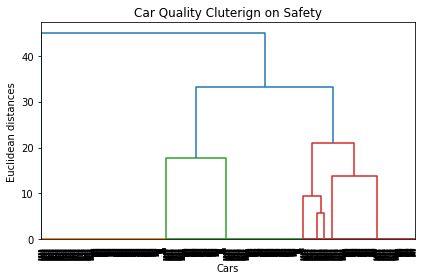

In [50]:
import scipy.cluster.hierarchy as sch
dendrogram =  sch.dendrogram(sch.linkage(df_carclass_on_safety, method = 'ward'))
plt.title('Car Quality Cluterign on Safety')
plt.xlabel('Cars')
plt.ylabel('Euclidean distances')
plt.tight_layout()

* If you walk accros 5 cross section

In [44]:
from sklearn.cluster import AgglomerativeClustering
hc1 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage= 'ward')

In [45]:
y_hc = hc1.fit_predict(df_carclass_on_safety)
print(y_hc)
#print(dataset)
print(df_carclass_on_safety[y_hc==0,0])

[3 2 4 ... 3 1 1]
[2 2 1 2 2 1 2 2 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2
 2 1 2 2 1 2 2 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 2
 1 2 2 1 2 2 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 2 1
 2 2 1 2 2 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 2 1 2
 2 1 2 2 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 2 1 2 2
 1 2 2 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 2 1 2 2 1
 2 2 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 1 2 1 2 1 1 2
 1 1 2 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 1 2 2 1 2 2 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 1 2
 1 2 1 1 2 1 1 2 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Visualize the prediction

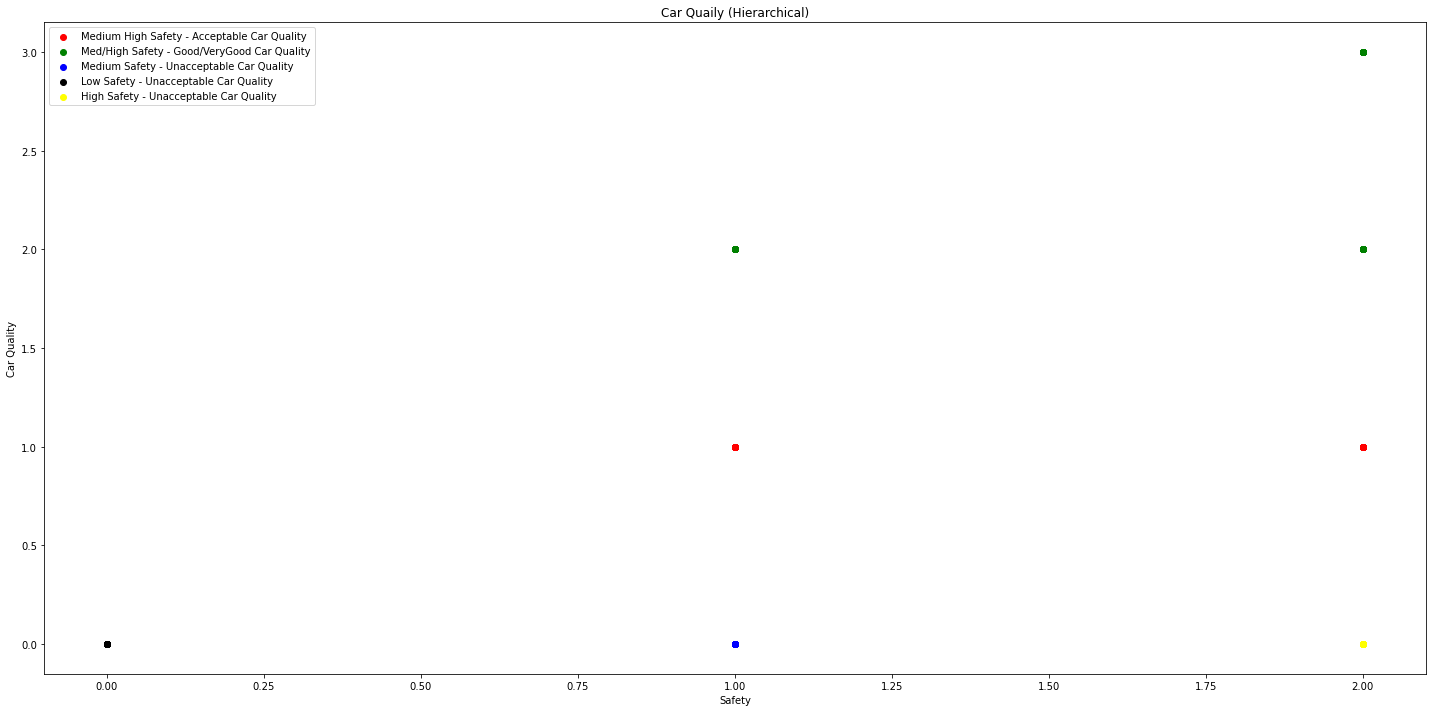

In [47]:
plt.figure(figsize=(20,10))
plt.scatter(df_carclass_on_safety[y_hc==0,0], df_carclass_on_safety[y_hc==0,1], c='red', label= 'Medium High Safety - Acceptable Car Quality')
plt.scatter(df_carclass_on_safety[y_hc==1,0], df_carclass_on_safety[y_hc==1,1], c='green', label= 'Med/High Safety - Good/VeryGood Car Quality')
plt.scatter(df_carclass_on_safety[y_hc==2,0], df_carclass_on_safety[y_hc==2,1], c='blue', label= 'Medium Safety - Unacceptable Car Quality')
plt.scatter(df_carclass_on_safety[y_hc==3,0], df_carclass_on_safety[y_hc==3,1], c='black', label= 'Low Safety - Unacceptable Car Quality')
plt.scatter(df_carclass_on_safety[y_hc==4,0], df_carclass_on_safety[y_hc==4,1], c='yellow', label= 'High Safety - Unacceptable Car Quality')
plt.title('Car Quaily (Hierarchical)')
plt.xlabel('Safety')
plt.ylabel('Car Quality')

plt.legend(loc='best')
#plt.show()
plt.tight_layout()

## Find the number of Car Quality clusters on buying price

In [48]:
df_carclass_on_buyingprice=df.iloc[:,[0,6]].values

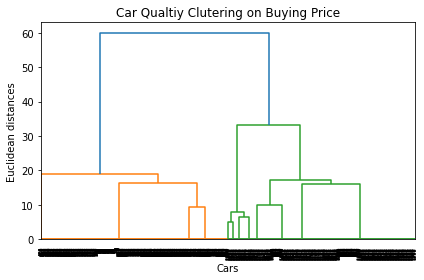

In [51]:
import scipy.cluster.hierarchy as sch
dendrogram =  sch.dendrogram(sch.linkage(df_carclass_on_buyingprice, method = 'ward'))
plt.title('Car Qualtiy Clutering on Buying Price')
plt.xlabel('Cars')
plt.ylabel('Euclidean distances')
plt.tight_layout()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage= 'ward')

In [52]:
y_hc2 = hc1.fit_predict(df_carclass_on_buyingprice)
print(y_hc2)
#print(dataset)
print(df_carclass_on_buyingprice[y_hc2==0,0])

[3 3 3 ... 1 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 

In [ ]:
# Visualize Prediction Buying Price and Car Quality

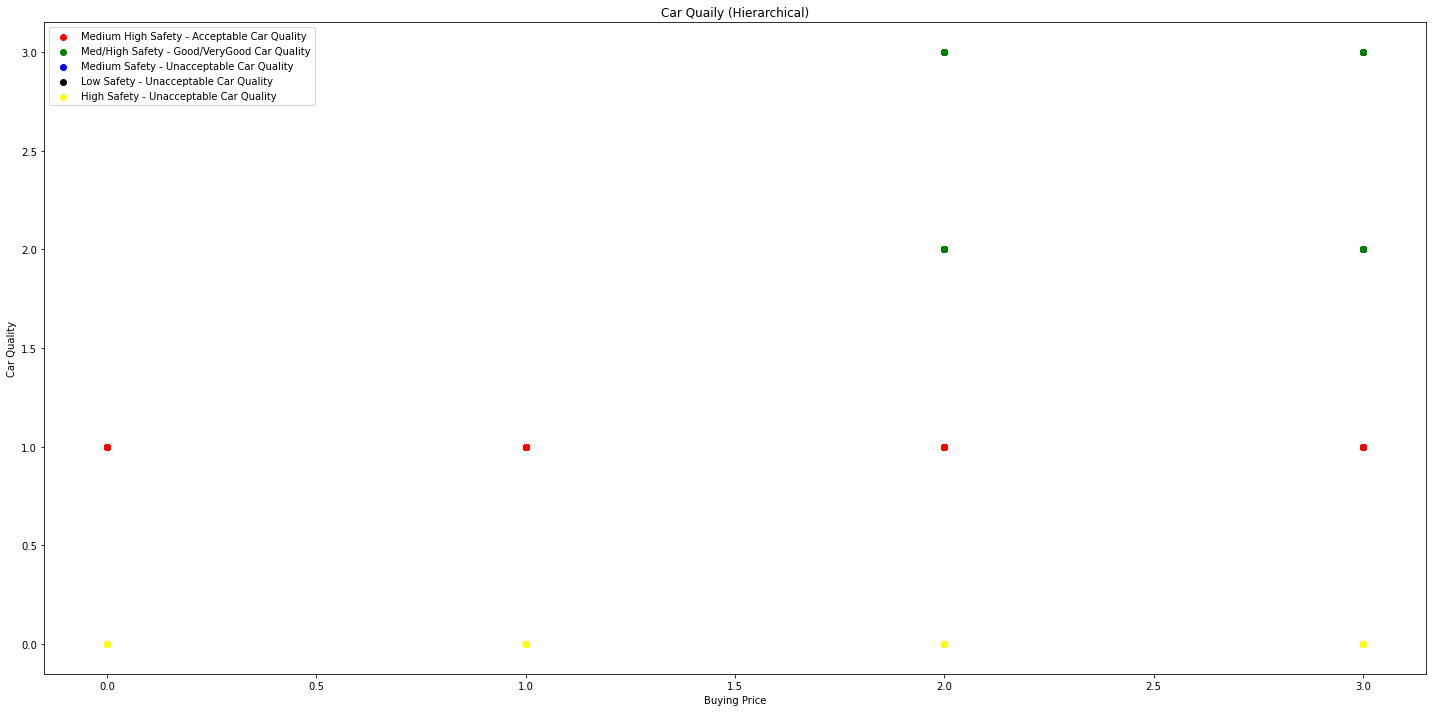

In [53]:
plt.figure(figsize=(20,10))
plt.scatter(df_carclass_on_buyingprice[y_hc==0,0], df_carclass_on_buyingprice[y_hc==0,1], c='red', label= 'Medium High Safety - Acceptable Car Quality')
plt.scatter(df_carclass_on_buyingprice[y_hc==1,0], df_carclass_on_buyingprice[y_hc==1,1], c='green', label= 'Med/High Safety - Good/VeryGood Car Quality')
plt.scatter(df_carclass_on_buyingprice[y_hc==2,0], df_carclass_on_buyingprice[y_hc==2,1], c='blue', label= 'Medium Safety - Unacceptable Car Quality')
plt.scatter(df_carclass_on_buyingprice[y_hc==3,0], df_carclass_on_buyingprice[y_hc==3,1], c='black', label= 'Low Safety - Unacceptable Car Quality')
plt.scatter(df_carclass_on_buyingprice[y_hc==4,0], df_carclass_on_buyingprice[y_hc==4,1], c='yellow', label= 'Low Buying Price - Unacceptable Car Quality')
plt.title('Car Quaily (Hierarchical)')
plt.xlabel('Buying Price')
plt.ylabel('Car Quality')

plt.legend(loc='best')
#plt.show()
plt.tight_layout()